<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_11_03_%EB%A6%BF%EC%A7%80%2C%EB%9D%BC%EC%8F%98%2C%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7%2C%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_MachineLearningGuide(p_319_334).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 규제 선형 모델의 개요
- 이전까지 선형모델의 비용함수는 RSS를 최소화하는(=실제값과 예측값의 차이를 최소화하는) 것만 고려 => 과적합
- RSS 최소화 방법(학습 데이터의 잔차 오퓨 값을 최소화)과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 균형을 이루어야 한다.

image.png
- alpha: 학습데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.
- alpha가 0 또는 매우 작은 값: 기존과 동일한 비용함수 식
- alpha가 무한대 또는 매우 큰 값: RSS(W)에 비해 alpha*|W|값이 매우 커짐
- W값을 0에 가깝게 만들어야 Cost가 최소화되는 비용 함수 목표를 달성 => 과적합 개선.
---
- 규제(Regulation): alpha을 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시켜 과적합 개선.
- L2 규제: W의 제곱에 패널티 부여 - 릿지(Ridge) 회귀
- L1 규제: W의 절대값에 패널티 부여 - 라쏘(Lasso) 회귀
---

### 릿지 회귀
- Ridge 클래스를 통해 예측.
- 파라미터: alpha = L2규제 계수
- 예측 성능을 cross_val_score()으로 평가

In [3]:
# 데이터 불러오기
import pandas as pd
import numpy as np
raw_df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

Boston 데이터 세트 크기: (506, 14)


In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5) # 예측 성능
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0: .3f}' .format(avg_rmse))

### LinearRegression의 RMSE 평균보다 더 뛰어난 예측 성능을 보여줌
##평균 제곱근 오차(RMSE)는 회귀 예측 모델에 대한 두 개의 주요 성과 지표. 평균 제곱근 오차는 예측 모델에서 예측한 값과 실제 값 사이의

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE :  5.518


- 릿지의 5개 폴드 세트의 평균 RMSE가 5.518으로, 앞 예제에 규제가 없는 LinearRegression보다 더 뛰어난 예측 성능을 보여준다



- 이번에는 alpha의 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE값과 회귀 계수를 시각화하고 DataFrame에 저장한다.

In [5]:
## 릿지의 alpha값을 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보기

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


- alpha 100일 때 평균 RMSE가 5.33으로 가장 좋다.
- 회귀 계수를 Ridge 객체의 coef_속성에 추출한 뒤 Series 객체로 만들어서 seaborn 가로 막대 차트로 표시하고 DataFrame에 alpha 값별 회귀 계수로 저장한다.

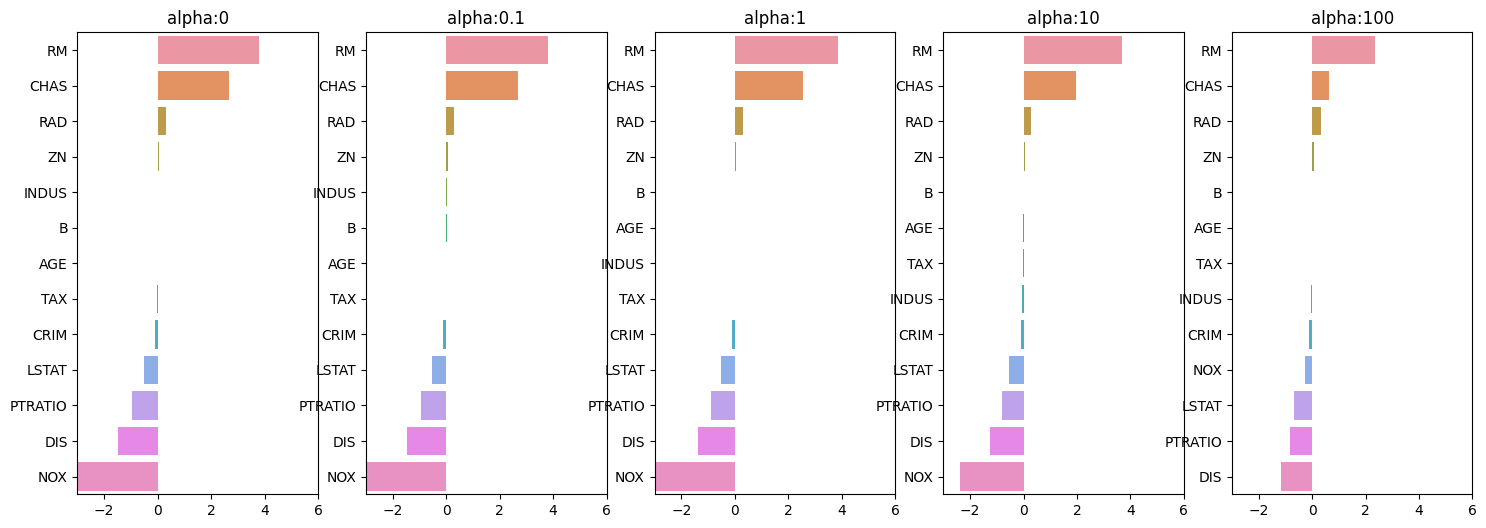

In [36]:
# alpha의 값의 변화에 따른 피처의 회귀 계수 갑승ㄹ 가로 막대 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

alphas = [0, 0.1, 1, 10, 100]
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 df생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  #alpha에 따른 피처별로 회귀 계수를 series로 변환하고 이를 df의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])


#for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 df로 표시
plt.show()

### alpha값을 계속 증가시킬 수록 회귀 계수 값을 지속적으로 작아짐을 알 수 있음.

In [37]:
## df에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀
- **L1규제**: W의 절댓값에 페널티를 부여. alpha*|W| 의미.
- 라쏘 회귀: 선형회귀에 L1 적용
- 라쏘 회귀 비용함수의 목표 : RSS(W) + alpha*|W| 식을 최소화하는 W 찾기
---
- L2규제 : 회귀 계수의 크기 감소
- **L1규제**: 불필요한 회귀 계수를 급격히 감소시켜 0으로 만들고 제거. 적절한 피처만 회귀에 포함시키는 **피처 선택 특성**
---
- 다음은 사이킷런의 Lasso 클래스를 통해 라쏘 회귀를 구현한 것이다.
- alpha: 라쏘 회귀의 alpha L1규제계수


In [8]:
### Ridge, Lasso, Elasticnet 중 하나를 구현하는 함수 get_linear_reg_eval()
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 df로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('####### ', model_name, '#######')
  for param in params:
    if model_name == 'Ridge':model = Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname] = coeff

  return coeff_df
#end of get_linear_regre_eval

- 위에서 정의한 함수를 통해 alpha값의 변화와 이에 따른 RMSE와 회귀계수들을 출력할 수 있다

In [9]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [10]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


-  INDUS, CHAS와 같은 속성의 회귀계수는 0이다. 회귀 계수가 0인 피처는 회귀 식에서 제외된 것이다.
- 이를 통해 Lasso에서는 피처 선택의 효과를 얻을 수 있음을 알 수 있다

### 엘라스틱넷 회귀
- L2규제와 L1규제를 결합한 회귀이다.
- 라쏘 회귀: 서로 상관관계가 높은 피처들의 경우 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 경향이 강하다. alpha값에 따라 회귀 계수 값이 급격히 변동하는 문제 발생
- 엘라스틱넷 회귀: 라쏘 회귀 + L2규제
- 엘라스틱넷 회귀의 단점: L1과 L2규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다.
---
- 엘라스틱넷 회귀의 주요 파라미터: alpha, l1_ratio
- 엘릿스틱넷의 규제: a x L1 + b x L2 (a는 L1규제의 alpha값, b는 L2규제의 alpha값)
- alpha : 릿지와 라쏘의 alpha와 다르다. alpha = a + b
- l1_ratio : a / (a + b)
---
- 위의 get_linear_reg_eval()은 l1_ratio가 0.7으로 고정되어 alpha값의 변화만 살핀다



In [11]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [12]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 df 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- alpha가 0.5일 때 RMSE가 5.467으로 가장 좋은 예측 성능을 보이고 있다.
- alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.
- 상황에 따라 최적의 예측성능은 다르다.
- 최적의 하이퍼파라미터를 찾아내는 것 못지않게 먼저 데이터 분포도의 정규화와 인코딩 방법은 매우 중요하다

### 선형 회귀 모델을 위한 데이터 변환
- 선형 회귀 모델은 feature값과 target값의 분포가 정규분포인 형태를 매우 선호한다
- 왜곡(skew)된 형태의 분포도는 예측 성능에 부정적인 영향을 미칠 수 있다 => 데이터 스케일링/정규화 작업 수행 후 선형회귀모델 적용
---
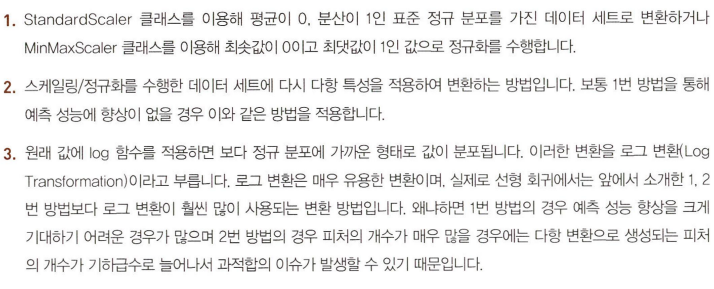
---
- target : 일반적으로 로그변환
- log()함수는 언더플로우 발생 가능 => 1+log() 함수 적용 => np.log1p()


-

In [13]:
# method는 표준 정규 분포 변환Standard, 최댓값/최솟값 정규화MinMax, 로그변환Log 결정
# p-degree는 다항식 특성을 추가할 때 적용. p-degree는 2이상 부여하지 않음
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

- 위에서 정의한 함수 get_scaled_data는 표준화/정규화/로그변환을 하는 함수이다. p_degree는 n차 다항식 변환을 의미한다. 로그 변환시에는  ("Log",None)을 한다

In [14]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    print('\n## 변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose=False)

### 데이터 값의 분포가 심하게 왜곡되어있을 경우엔 로그 변환 적용이 유리


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형 : Log, Polynomial Degree

- 위는 ridge class의 alpha값을 변화시키며 피처 데이터 세트를 여러가지 방법으로 변환한 데이터 세트를 입력받을 경우 RMSE값이 어떻게 변하는지 살펴본 것이다

# 로지스틱 회귀

- 로지스틱 회귀: 선형 회귀 방식 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 알고리즘
- 회귀가 선형인가 아닌가는 가중치 weight 변수가 선형인지 아닌지를 따른다
- 선형 회귀의 최적선을 찾는 것이 아니라 시그모이드sigmoid 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정한다

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardSclaer()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc: 0.972


- LogisticRegression 클래스의 주요 하이퍼 파라미터
      1. penalty: l1이면 L1규제, l2이면 L2규제
      2. C :규제 강도를 조절하는 alpha의 역수. C값이 작을수록 규제 강도가 크다



- GridSearchCV를 이용해 위스콘신 dataset에서 이 하이퍼 파라미터를 최적화해 본다


In [42]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


params = {'penalty':['l2', 'l1'], 'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도0.975


- 로지스틱 회귀는 가볍고 빠르지만 이진분류 예측도 뛰어나다. 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용한다
- 로지스틱 회귀는 희소한 dataset분류에도 뛰어난 성능을 보여 텍스트 분류에 자주 이용된다